Tugas Group Project 1
=====================
## Anggota Kelompok
1. Muhammad Faqih (5026211001)
2. I Gusti Agung Jaya Hiswara (5026211122)
3. Candline
4. Afaf

## Deskripsi Tugas 1: Eksplorasi dan Prapemrosesan Data Kriminal Los Angeles
Tugas 1 ini bertujuan untuk melakukan eksplorasi dan prapemrosesan dataset kejahatan di Los Angeles dari tahun 2020 hingga sekarang. Proyek ini berfokus pada analisis data untuk mengidentifikasi pola-pola kriminal dan mempersiapkan dataset yang bersih dan siap untuk model prediksi. Data yang diolah mencakup atribut seperti jenis kejahatan (Crm Cd atau Crm Cd Desc) yang akan digunakan sebagai label kelas, waktu, lokasi, dan data korban.

## Tahapan & Langkah-langkah
1. Eksplorasi Data
Pada bagian ini, kita akan melakukan langkah-langkah berikut:
Memuat dataset dan menampilkan beberapa baris pertama.
Memeriksa kolom dan tipe data untuk memahami struktur data.
Menganalisis distribusi kelas target (Crm Cd atau Crm Cd Desc).
Memeriksa missing values dan menentukan kolom yang memerlukan perhatian khusus.
Melakukan analisis statistik deskriptif untuk fitur numerik.
Menyediakan visualisasi awal seperti histogram dan bar plot untuk memahami pola-pola utama dalam data.

2. Pembersihan Data
Bagian ini akan mencakup:
Penanganan missing values dengan berbagai strategi seperti penghapusan atau pengisian nilai.
Mengidentifikasi dan menghapus data yang tidak relevan.
Menghapus data duplikat.
Mengatasi outlier dalam fitur numerik seperti usia korban atau waktu kejahatan.

3. Transformasi Data
Pada tahap ini, kita akan melakukan:
Konversi waktu dan tanggal ke dalam format yang dapat dianalisis, serta mengekstrak fitur baru seperti hari, bulan, dan jam kejadian.
One-hot encoding untuk variabel kategorikal.
Normalisasi atau standarisasi untuk kolom numerik.
Feature engineering dengan membuat fitur baru berdasarkan waktu atau lokasi, seperti biner siang/malam.

4. Visualisasi dan Analisis Awal
Visualisasi lebih dalam akan dilakukan, termasuk:
Distribusi kejahatan berdasarkan waktu, untuk melihat tren temporal.
Pemetaan kejahatan berdasarkan lokasi, jika data lokasi tersedia, menggunakan heatmap atau scatter plot.
Membuat matriks korelasi untuk memahami hubungan antar fitur.

5. Evaluasi dan Kesimpulan
Akhir dari notebook ini akan menyiapkan:
Simpulan dari eksplorasi data, dengan penjelasan fitur-fitur yang paling relevan untuk prediksi.
Menyediakan dataset akhir yang bersih dan siap untuk pemodelan.
Menyimpan dataset hasil prapemrosesan dalam format CSV.

## Output yang Diharapkan

Dokumentasi Jupyter Notebook dari seluruh proses eksplorasi dan pembersihan data.
Visualisasi yang memberikan wawasan mendalam terhadap pola-pola dalam data kejahatan.
Dataset bersih yang siap digunakan untuk pemodelan prediksi jenis kejahatan.

## Install & Import Library


In [13]:
#Install Library
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn

#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# 1. Eksplorasi Data (Data Exploration)

## Memuat Dataset

In [14]:
# Load the Crime Data
df = pd.read_csv('tugas1/Crime_Data_from_2020_to_Present.csv')

#Show the first 15 rows of the data
print(df.head(15))

        DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1   200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2   200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3   200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4   220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   
5   231808869  04/04/2023 12:00:00 AM  12/01/2020 12:00:00 AM      2300    18   
6   230110144  04/04/2023 12:00:00 AM  07/03/2020 12:00:00 AM       900     1   
7   220314085  07/22/2022 12:00:00 AM  05/12/2020 12:00:00 AM      1110     3   
8   231309864  04/28/2023 12:00:00 AM  12/09/2020 12:00:00 AM      1400    13   
9   211904005  12/31/2020 12:00:00 AM  12/31/2020 12:00:00 AM      1220    19   
10  221804943  01/21/2022 12:00:00 AM  07/01/2020 12:00:00 AM      1335    18   
11  221908151  04/12/2022 12

## Memeriksa Kolom dan Tipe Data

In [15]:
# Memeriksa Kolom dan Tipe Data: Identifikasi kolom apa saja yang tersedia dan tipe data masing-masing kolom. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

In [21]:
#  Cek Missing Value: Identifikasi apakah ada missing value pada dataset.
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           143980
Vict Age               0
Vict Sex          137198
Vict Descent      137209
Premis Cd             15
Premis Desc          585
Weapon Used Cd    652669
Weapon Desc       652669
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          909812
Crm Cd 3          976319
Crm Cd 4          978564
LOCATION               0
Cross Street      827201
LAT                    0
LON                    0
dtype: int64


In [23]:
# Drop Missing Value: Jika ada kolom yang memiliki missing value, maka buanglah missing value tersebut.
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 66026 to 922659
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           10 non-null     int64  
 1   Date Rptd       10 non-null     object 
 2   DATE OCC        10 non-null     object 
 3   TIME OCC        10 non-null     int64  
 4   AREA            10 non-null     int64  
 5   AREA NAME       10 non-null     object 
 6   Rpt Dist No     10 non-null     int64  
 7   Part 1-2        10 non-null     int64  
 8   Crm Cd          10 non-null     int64  
 9   Crm Cd Desc     10 non-null     object 
 10  Mocodes         10 non-null     object 
 11  Vict Age        10 non-null     int64  
 12  Vict Sex        10 non-null     object 
 13  Vict Descent    10 non-null     object 
 14  Premis Cd       10 non-null     float64
 15  Premis Desc     10 non-null     object 
 16  Weapon Used Cd  10 non-null     float64
 17  Weapon Desc     10 non-null     ob

In [25]:
# Pastikan kolom Crm Cd Desc atau Crm Cd akan digunakan sebagai target kelas.

# Copy Data: Copy dataset ke dalam variabel baru (df_model).
df_target = df.copy()

# Drop Kolom: Buang kolom-kolom yang tidak akan digunakan dalam pemodelan.
df_target = df_target.drop(['AREA', 'DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA NAME','Rpt Dist No','Part 1-2','Crm Cd','Mocodes','Vict Age','Vict Sex','Vict Descent','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street','LAT','LON'], axis=1)

df_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 66026 to 922659
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Crm Cd Desc  10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


# Distribusi Target Kelas:
Buat distribusi kelas dari Crm Cd Desc atau Crm Cd untuk mengetahui frekuensi masing-masing jenis kejahatan.
Periksa apakah terdapat kelas yang dominan? Apakah distribusi kelas seimbang atau tidak?

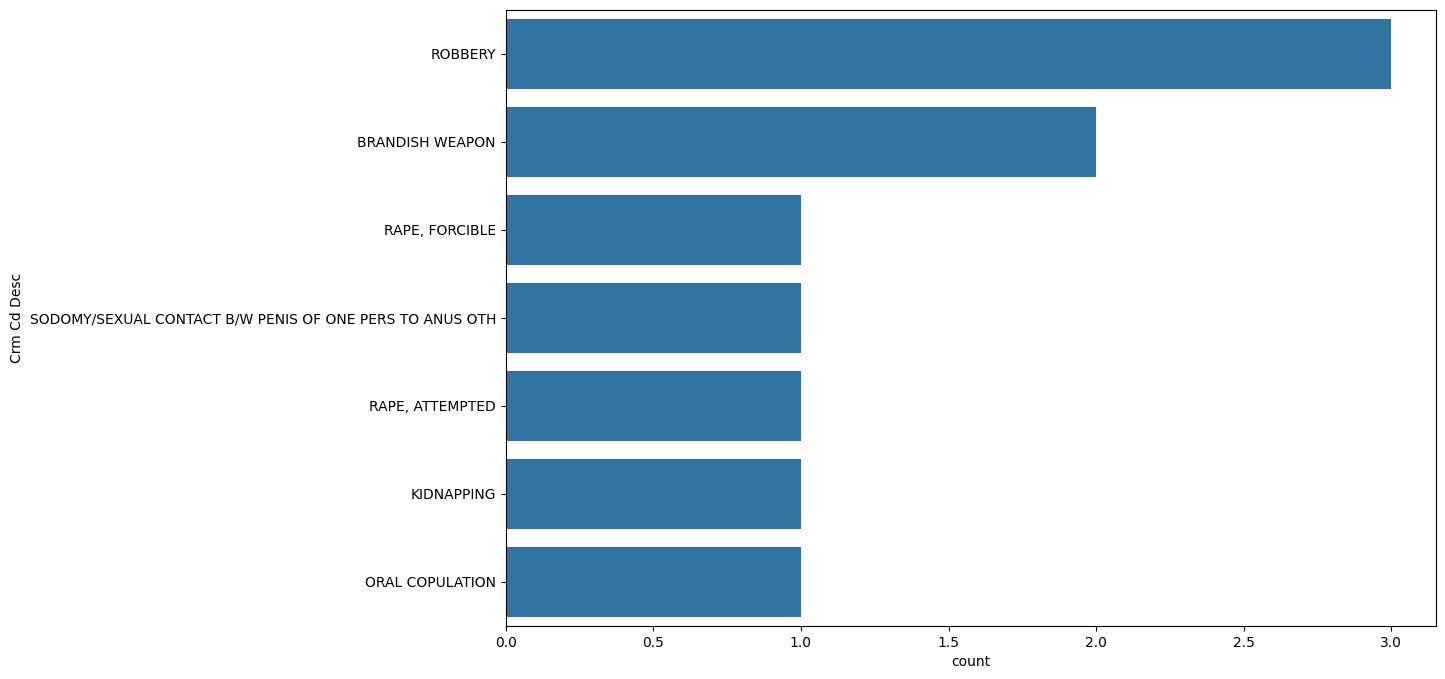

In [28]:
#  Buat distribusi kelas dari Crm Cd Desc atau Crm Cd untuk mengetahui frekuensi masing-masing jenis kejahatan.
df_target['Crm Cd Desc'].value_counts()

#  Buat visualisasi distribusi kelas dari Crm Cd Desc atau Crm Cd.
plt.figure(figsize=(12,8))
sns.countplot(y='Crm Cd Desc', data=df_target, order=df_target['Crm Cd Desc'].value_counts().index)
plt.show()



In [30]:
# Periksa apakah terdapat kelas yang dominan? Apakah distribusi kelas seimbang atau tidak?
is_balanced = df_target['Crm Cd Desc'].value_counts().max() / df_target['Crm Cd Desc'].value_counts().sum() < 0.8

if is_balanced:
    print('Distribusi kelas tidak seimbang')
else:
    print('Distribusi kelas seimbang')

Distribusi kelas tidak seimbang
